# Neural Networks Learning

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# library written for this exercise providing additional functions for assignment submission, and others
import utils


# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [12]:
import pandas as pd

In [2]:
#  training data stored in arrays X, y
data = loadmat('ex4data1.mat')
X, y = data['X'], data['y'].ravel()

# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0

# Number of training examples
m = y.size

In [4]:
X.shape

(5000, 400)

## 1.1 Visualizing the data

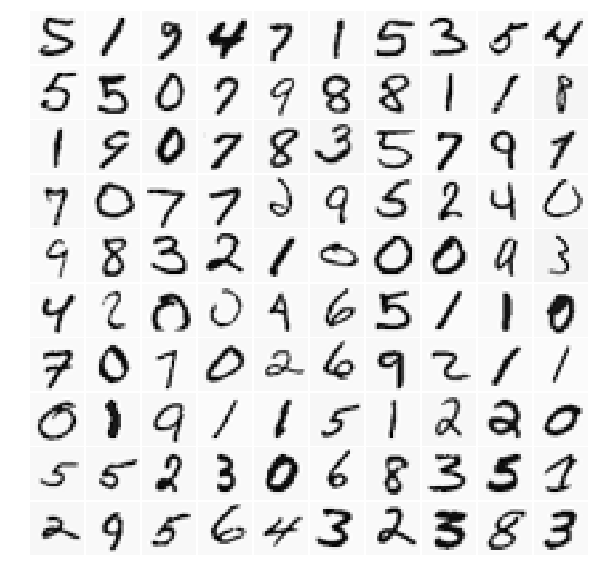

In [5]:
# Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

utils.displayData(sel)

## 1.2 Model representation

In [7]:
# Setup the parameters you will use for this exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 0 to 9

# Load the weights into variables Theta1 and Theta2
weights = loadmat('ex4weights.mat')

# Theta1 has size 25 x 401
# Theta2 has size 10 x 26
Theta1, Theta2 = weights['Theta1'], weights['Theta2']

# swap first and last columns of Theta2, due to legacy from MATLAB indexing, 
# since the weight file ex3weights.mat was saved based on MATLAB indexing
Theta2 = np.roll(Theta2, 1, axis=0)

# Unroll parameters 
nn_params = np.concatenate([Theta1.ravel(), Theta2.ravel()])

In [9]:
nn_params.shape, Theta1.shape, Theta2.shape

((10285,), (25, 401), (10, 26))

In [11]:
y

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

## 1.3 Feedforward and cost function

In [13]:
y_matrix = pd.get_dummies(y.ravel()).as_matrix()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [15]:
y_matrix.shape

(5000, 10)

In [16]:
def sigmoidGradient(z):
    return(sigmoid(z)*(1-sigmoid(z)))

In [ ]:
def nnCostFunction(nn_params,
                   input_layer_size,
                   hidden_layer_size,
                   num_labels,
                   X, y, lambda_=0.0):
    
    # Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices
    # for our 2 layer neural network
    Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                        (hidden_layer_size, (input_layer_size + 1)))

    Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                        (num_labels, (hidden_layer_size + 1)))

    # Setup some useful variables
    m = y.size
         
    # You need to return the following variables correctly 
    J = 0
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)   
    
    a1 = np.concatenate([np.ones(m,1),X], axis=1)
    z2 = Theta1.dot(a1.T)
    a2 = np.concatenate[np.ones((m,1)),utils.sigmoid(z2.T)]
    
    z3 = Theta2.dot(a2.T) # 10x26 * 26x5000 = 10x5000 
    a3 = utils.sigmoid(z3) # 10x5000
    
    J = -1*(1/m)*np.sum((np.log(a3.T)*(y)+np.log(1-a3).T*(1-y_matrix))) + \
        (reg/(2*m))*(np.sum(np.square(theta1[:,1:])) + np.sum(np.square(theta2[:,1:])))
    
    
    y_matrix = pd.get_dummies(y.ravel()).as_matrix()
    
    d3 = a3.T - y_matrix # 5000x10
    d2 = Theta2[:,1:].T.dot(d3.T)*sigmoidGradient(z2) # 25x10 *10x5000 * 25x5000 = 25x5000
    
    delta1 = d2.dot(a1) # 25x5000 * 5000x401 = 25x401
    delta2 = d3.T.dot(a2) # 10x5000 *5000x26 = 10x26
    
    theta1_ = np.concatenate[np.ones((theta1.shape[0],1)),theta1[:,1:]]
    theta2_ = np.concatenate[np.ones((theta2.shape[0],1)),theta2[:,1:]]
    
    theta1_grad = delta1/m + (theta1_*reg)/m
    theta2_grad = delta2/m + (theta2_*reg)/m
    
    return(J, theta1_grad, theta2_grad)
    